In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
from pylab import rcParams
rcParams["figure.figsize"]=30,16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/v_12.xlsx",sheet_name = 'ln_orig')
data.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc5,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6
0,0062M00000gYsKAQA0,LCFLN202208126655,0062M00000gYsKAQA0,7.278946e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,691.0,B026,B052,B036,B037,NaN,NaN
1,0062M00000gYSqdQAG,LCFLN202208126660,0062M00000gYSqdQAG,0.000000e+00,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,222.0,B068,NaN,NaN,NaN,NaN,NaN
2,0062M00000itNw6QAE,LCFLN202208127456,0062M00000itNw6QAE,7.087273e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,704.0,B069,B063,B052,B066,NaN,NaN
3,0062M00000ito3xQAA,LCFLN202208127457,0062M00000ito3xQAA,4.411074e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,692.0,B026,B069,B066,B076,NaN,NaN
4,0062M00000n0BgNQAU,LCFLN202208130968,0062M00000n0BgNQAU,1.345410e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,708.0,B069,B036,B052,B070,NaN,NaN


In [7]:
"WriteOff_YN" in data

False

In [5]:
wo = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/v_12.xlsx",sheet_name = 'ren_orig')

In [8]:
wo.columns

Index(['OpportunityID_ren', 'CreatedDate', 'FundedDate', 'OpportunityName',
       'Priordeal_OppID', 'Renewal_PreviousCollectionStatus',
       'Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_PreviousCreditScore', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousHBwoLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'Last3Months_MA_OverdraftDays', 'Last3Months_MA_NumReturnItems',
       'Last3Months_Sum_NumReturnItems', 'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'Is_this_Business_home_based__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c', 'HBwoLCF',
       'Contract_HoldBack__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
 

In [10]:
wo = wo[['OpportunityID_ren','WriteOff_YN']]

In [11]:
wo

,OpportunityID_ren,WriteOff_YN
0,0062M00000o8ivqQAA,0.0
1,0062M00000hmHKAQA2,1.0
2,0062M00000kxeWLQAY,0.0
3,0062M00000mTGVnQAO,1.0
4,0062M00000gb1LRQAY,0.0
...,...,...
3963,0062M00000lWtjxQAC,0.0
3964,0062M00000bnAyFQAU,1.0
3965,0062M00000dioFlQAI,0.0
3966,0062M00000bngjMQAQ,1.0


In [12]:
d = pd.merge(data, wo, on="OpportunityID_ren")

In [13]:
d

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6,WriteOff_YN
0,0062M00000gYsKAQA0,LCFLN202208126655,0062M00000gYsKAQA0,7.278946e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,691.0,B026,B052,B036,B037,NaN,NaN,0.0
1,0062M00000gYSqdQAG,LCFLN202208126660,0062M00000gYSqdQAG,0.000000e+00,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,222.0,B068,NaN,NaN,NaN,NaN,NaN,0.0
2,0062M00000itNw6QAE,LCFLN202208127456,0062M00000itNw6QAE,7.087273e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,704.0,B069,B063,B052,B066,NaN,NaN,0.0
3,0062M00000ito3xQAA,LCFLN202208127457,0062M00000ito3xQAA,4.411074e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,692.0,B026,B069,B066,B076,NaN,NaN,0.0
4,0062M00000n0BgNQAU,LCFLN202208130968,0062M00000n0BgNQAU,1.345410e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,708.0,B069,B036,B052,B070,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,LCFLN202208126604,0062M00000gYcpIQAS,1.337832e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,652.0,B026,B069,B034,B052,NaN,NaN,0.0
3685,0062M00000gYdrBQAS,LCFLN202208126606,0062M00000gYdrBQAS,1.335285e+11,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,619.0,B026,B074,B063,B070,NaN,NaN,0.0
3686,0062M00000gYfg0QAC,LCFLN202208126608,0062M00000gYfg0QAC,5.107907e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,684.0,B026,B078,B063,B037,NaN,NaN,1.0
3687,0062M00000gYic7QAC,LCFLN202208126614,0062M00000gYic7QAC,2.199165e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,222.0,B068,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
data = d.copy()

In [15]:
data['b2bactv1pdpdbaltot'].value_counts()

-99998.0    2419
-99999.0     537
 0.0         311
 1743.0        8
 8003.0        7
            ... 
 29669.0       1
 173.0         1
 204.0         1
 500.0         1
 10497.0       1
Name: b2bactv1pdpdbaltot, Length: 347, dtype: int64

In [16]:
data['b2bactv1pdpdbaltotgrow1y'].value_counts()

-99998.0000    2776
-99999.0000     537
-99997.0000     147
 0.0000          40
 1.0000          30
               ... 
 7.5142           1
 0.3578           1
 929.2857         1
 3.8313           1
 3.4804           1
Name: b2bactv1pdpdbaltotgrow1y, Length: 161, dtype: int64

## Analysing b2bactv1pdpdbaltot

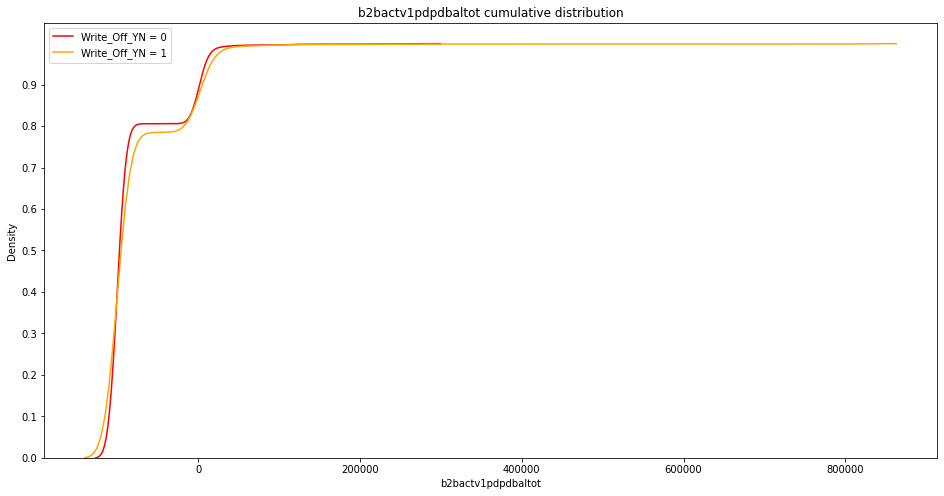

In [17]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = data[data['WriteOff_YN']==0]['b2bactv1pdpdbaltot'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = data[data['WriteOff_YN']==1]['b2bactv1pdpdbaltot'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltot cumulative distribution')
plt.legend()

In [18]:
b2b1 = pd.DataFrame({'b2bactv1pdpdbaltot':data['b2bactv1pdpdbaltot'],'WriteOff_YN':data['WriteOff_YN']})

In [19]:
b2b1

,b2bactv1pdpdbaltot,WriteOff_YN
0,0.0,0.0
1,-99999.0,0.0
2,-99998.0,0.0
3,-99998.0,0.0
4,284.0,0.0
...,...,...
3684,-99998.0,0.0
3685,-99998.0,0.0
3686,-99998.0,1.0
3687,-99999.0,1.0


In [20]:
b2b1[b2b1['b2bactv1pdpdbaltot']<=0]['b2bactv1pdpdbaltot'].unique()

array([     0., -99999., -99998.])

In [ ]:
b2b1['flag'] = b2b1['b2bactv1pdpdbaltot'].apply(lambda x: 1 if x<0 else 0)

In [ ]:
b2b1['flag'].value_counts()

1    2715
0     667
Name: flag, dtype: int64

In [ ]:
b2b1

,b2bactv1pdpdbaltot,WriteOff_YN,flag
0,293.0,0.0,0
1,0.0,0.0,0
2,-99998.0,0.0,1
3,-99998.0,0.0,1
4,-99998.0,1.0,1
...,...,...,...
3377,-99998.0,0.0,1
3378,-99998.0,0.0,1
3379,-99998.0,1.0,1
3380,-99999.0,1.0,1


In [ ]:
b2b1['value'] = b2b1['b2bactv1pdpdbaltot'].apply(lambda x:-1 if x<0 else x)

In [ ]:
b2b1['value'].value_counts()

-1.0        2715
 0.0         279
 8003.0        7
 1743.0        7
 5720.0        6
            ... 
 99896.0       1
 294.0         1
 284.0         1
 2243.0        1
 350.0         1
Name: value, Length: 320, dtype: int64

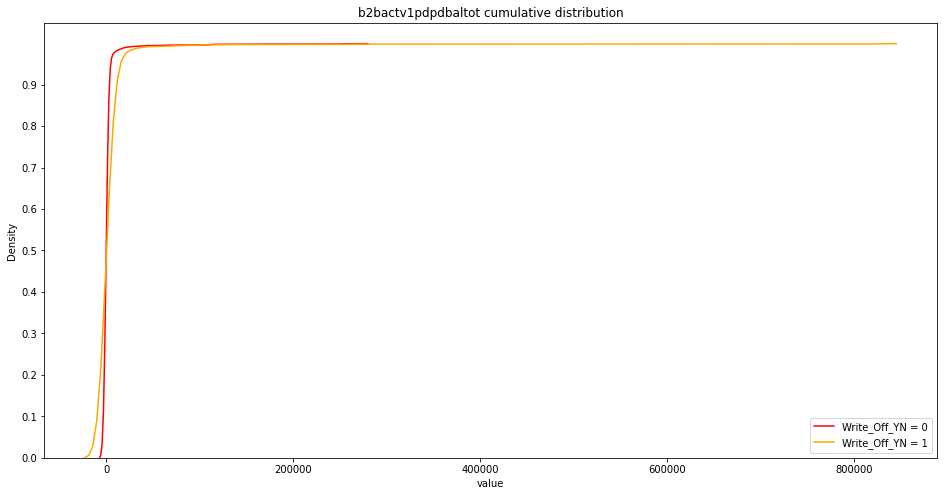

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==0]['value'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==1]['value'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltot cumulative distribution')
plt.legend()

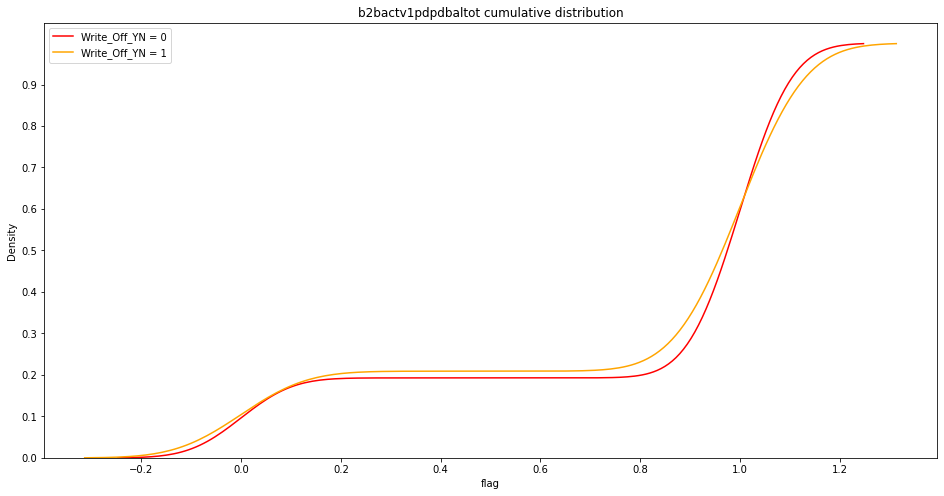

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==0]['flag'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b1[b2b1['WriteOff_YN']==1]['flag'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltot cumulative distribution')
plt.legend()

In [ ]:
data.corr()['WriteOff_YN']['b2bactv1pdpdbaltot']

0.02805054004693779

In [ ]:
b2b1.corr()['WriteOff_YN']['value']

0.03231467895026405

## Analysing b2bactv1pdpdbaltotgrow1y

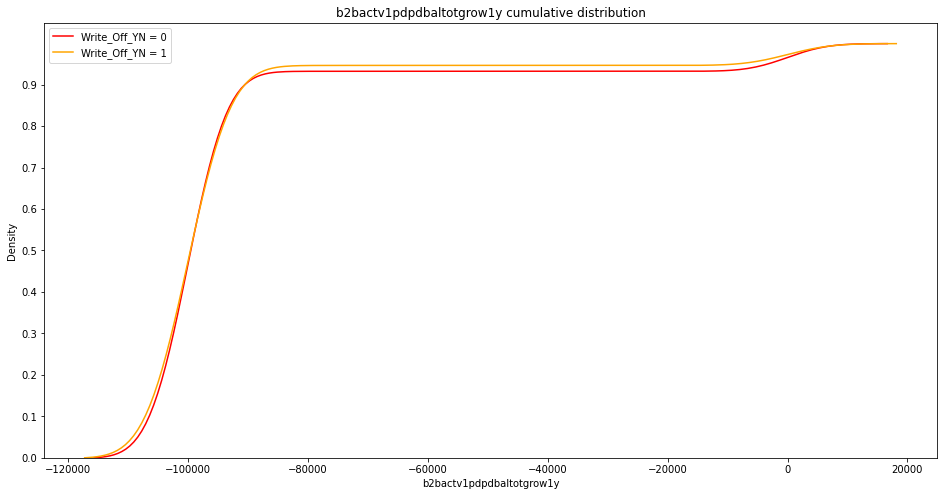

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = data[data['WriteOff_YN']==0]['b2bactv1pdpdbaltotgrow1y'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = data[data['WriteOff_YN']==1]['b2bactv1pdpdbaltotgrow1y'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltotgrow1y cumulative distribution')
plt.legend()

In [ ]:
b2b2 = data[['b2bactv1pdpdbaltotgrow1y','WriteOff_YN']]
b2b2

,b2bactv1pdpdbaltotgrow1y,WriteOff_YN
0,4.5077,0.0
1,-99997.0000,0.0
2,-99998.0000,0.0
3,-99998.0000,0.0
4,-99998.0000,1.0
...,...,...
3377,-99998.0000,0.0
3378,-99998.0000,0.0
3379,-99998.0000,1.0
3380,-99999.0000,1.0


In [ ]:
b2b2['b2bactv1pdpdbaltotgrow1y'].max()

965.0

In [ ]:
b2b2[b2b2['b2bactv1pdpdbaltotgrow1y']<=0]['b2bactv1pdpdbaltotgrow1y'].unique()

array([-99997., -99998., -99999.,      0.])

In [ ]:
b2b2['flag'] = b2b2['b2bactv1pdpdbaltotgrow1y'].apply(lambda x: 1 if x<0 else 0)

In [ ]:
b2b2['flag'].value_counts()

1    3169
0     213
Name: flag, dtype: int64

In [ ]:
b2b2

,b2bactv1pdpdbaltotgrow1y,WriteOff_YN,flag
0,4.5077,0.0,0
1,-99997.0000,0.0,1
2,-99998.0000,0.0,1
3,-99998.0000,0.0,1
4,-99998.0000,1.0,1
...,...,...,...
3377,-99998.0000,0.0,1
3378,-99998.0000,0.0,1
3379,-99998.0000,1.0,1
3380,-99999.0000,1.0,1


In [ ]:
b2b2['value'] = b2b2['b2bactv1pdpdbaltotgrow1y'].apply(lambda x:-1 if x<0 else x)

In [ ]:
b2b2['value'].value_counts()

-1.0000    3169
 0.0000      38
 1.0000      29
 2.0000       2
 8.0193       2
           ... 
 1.9674       1
 1.9400       1
 0.9809       1
 1.4455       1
 1.2281       1
Name: value, Length: 147, dtype: int64

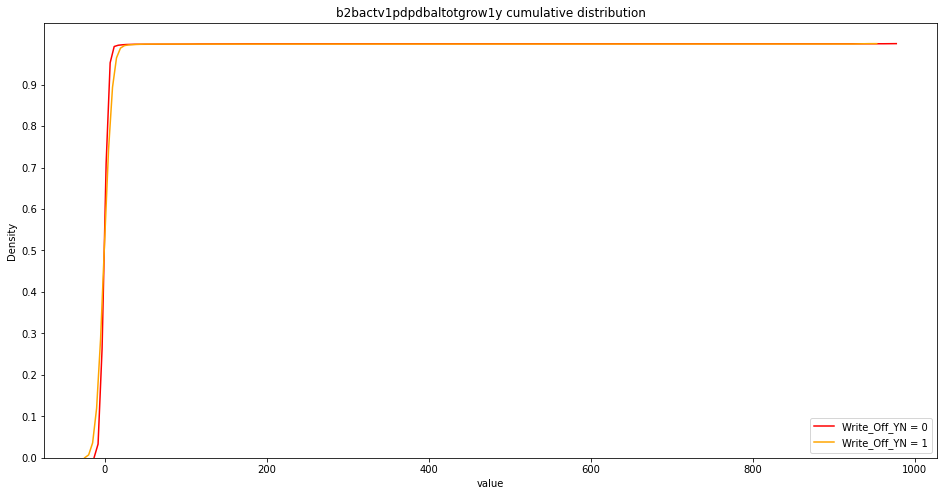

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==0]['value'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==1]['value'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltotgrow1y cumulative distribution')
plt.legend()

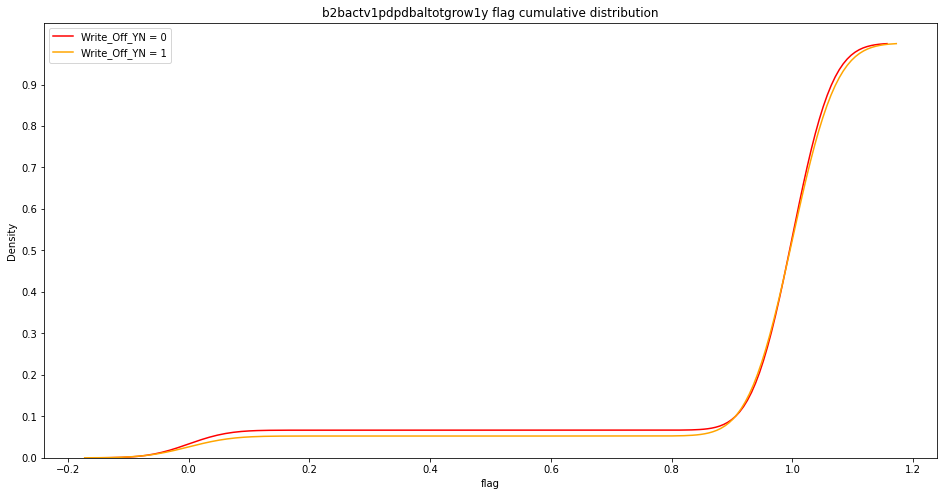

In [ ]:
plt.figure(figsize = (16,8))

sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==0]['flag'], cumulative = True, label = "Write_Off_YN = 0",color = 'red')
sns.kdeplot(data = b2b2[b2b2['WriteOff_YN']==1]['flag'], cumulative = True, label = "Write_Off_YN = 1",color = 'orange')
# plt.xticks(np.arange(0,900,50))
plt.yticks(np.arange(0,1,0.1))
plt.title('b2bactv1pdpdbaltotgrow1y flag cumulative distribution')
plt.legend()

In [ ]:
b2b2['value'].groupby(b2b2['WriteOff_YN']).describe()

,count,mean,std,min,25%,50%,75%,max
WriteOff_YN,,,,,,,,
0.0,2488.0,-0.274526,19.818724,-1.0,-1.0,-1.0,-1.0,965.0000
1.0,894.0,0.276939,31.172303,-1.0,-1.0,-1.0,-1.0,929.2857


In [ ]:
b2b2['b2bactv1pdpdbaltotgrow1y'].groupby(b2b2['WriteOff_YN']).describe()

,count,mean,std,min,25%,50%,75%,max
WriteOff_YN,,,,,,,,
0.0,2488.0,-93325.554671,24960.707416,-99999.0,-99998.0,-99998.0,-99998.0,965.0000
1.0,894.0,-94739.737602,22335.186702,-99999.0,-99998.0,-99998.0,-99998.0,929.2857


In [ ]:
data.corr()['WriteOff_YN']['b2bactv1pdpdbaltotgrow1y']

-0.025668521657300512

In [ ]:
b2b2.corr()['WriteOff_YN']['value']

0.010412429681199613

## B2B Trade Line - Activity
* B2BCnt2Y
* B2BCarrCnt2Y
* B2BFltCnt2Y
* B2BMatCnt2Y
* B2BOpsCnt2Y
* B2BOthCnt2Y
* B2BCarrPct2Y
* B2BFltPct2Y
* B2BMatPct2Y
* B2BOpsPct2Y
* B2BOthPct2Y
* B2BOldMsnc2Y
* B2BNewMsnc2Y

'abc'

In [21]:
b2b_tl_activity = ['B2BCnt2Y',
'B2BCarrCnt2Y',
'B2BFltCnt2Y',
'B2BMatCnt2Y',
'B2BOpsCnt2Y',
'B2BOthCnt2Y',
'B2BCarrPct2Y',
'B2BFltPct2Y',
'B2BMatPct2Y',
'B2BOpsPct2Y',
'B2BOthPct2Y',
'B2BOldMsnc2Y',
'B2BNewMsnc2Y']
len(b2b_tl_activity)

13

In [22]:
b2b_tl_activity = list(map(str.lower, b2b_tl_activity)) 
b2b_tl_activity

['b2bcnt2y',
 'b2bcarrcnt2y',
 'b2bfltcnt2y',
 'b2bmatcnt2y',
 'b2bopscnt2y',
 'b2bothcnt2y',
 'b2bcarrpct2y',
 'b2bfltpct2y',
 'b2bmatpct2y',
 'b2bopspct2y',
 'b2bothpct2y',
 'b2boldmsnc2y',
 'b2bnewmsnc2y']

In [23]:
b2b_tl_activity.append('OpportunityID_ren')
b2b_tl_activity.append('WriteOff_YN')

In [24]:
df = data[b2b_tl_activity]

In [25]:
df.shape

(3689, 15)

In [26]:
df.describe()

,b2bcnt2y,b2bcarrcnt2y,b2bfltcnt2y,b2bmatcnt2y,b2bopscnt2y,b2bothcnt2y,b2bcarrpct2y,b2bfltpct2y,b2bmatpct2y,b2bopspct2y,b2bothpct2y,b2boldmsnc2y,b2bnewmsnc2y,WriteOff_YN
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,-14556.007861,-14556.610464,-14556.493901,-14556.542966,-14556.401735,-14556.531309,-72266.904134,-72259.752724,-72265.960079,-72255.298121,-72262.083378,-72263.483329,-72266.741664,0.265926
std,35271.940965,35271.692165,35271.740285,35271.720045,35271.778334,35271.724841,44773.528175,44785.079476,44775.053277,44792.272190,44781.314761,44779.050954,44773.790121,0.441885
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
max,29.000000,14.000000,8.000000,29.000000,7.000000,14.000000,100.000000,100.000000,100.000000,100.000000,100.000000,23.000000,23.000000,1.000000


In [27]:
df.isnull().sum()

b2bcnt2y             0
b2bcarrcnt2y         0
b2bfltcnt2y          0
b2bmatcnt2y          0
b2bopscnt2y          0
b2bothcnt2y          0
b2bcarrpct2y         0
b2bfltpct2y          0
b2bmatpct2y          0
b2bopspct2y          0
b2bothpct2y          0
b2boldmsnc2y         0
b2bnewmsnc2y         0
OpportunityID_ren    0
WriteOff_YN          0
dtype: int64

In [29]:
round(df.corr()['WriteOff_YN'], 4)

b2bcnt2y       -0.0195
b2bcarrcnt2y   -0.0195
b2bfltcnt2y    -0.0195
b2bmatcnt2y    -0.0195
b2bopscnt2y    -0.0195
b2bothcnt2y    -0.0195
b2bcarrpct2y    0.0123
b2bfltpct2y     0.0123
b2bmatpct2y     0.0123
b2bopspct2y     0.0123
b2bothpct2y     0.0123
b2boldmsnc2y    0.0123
b2bnewmsnc2y    0.0123
WriteOff_YN     1.0000
Name: WriteOff_YN, dtype: float64

In [30]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bcnt2y
 0.0        2129
-99999.0     537
 1.0         483
 2.0         266
 3.0         134
 4.0          64
 5.0          29
 7.0          11
 6.0           9
 9.0           6
 21.0          3
 8.0           3
 17.0          2
 11.0          2
 10.0          2
 12.0          2
 22.0          1
 28.0          1
 20.0          1
 18.0          1
 16.0          1
 27.0          1
 29.0          1
Name: b2bcnt2y, dtype: int64
attribute_name : b2bcarrcnt2y
 0.0        3101
-99999.0     537
 1.0          35
 3.0           6
 4.0           3
 13.0          3
 2.0           2
 14.0          1
 5.0           1
Name: b2bcarrcnt2y, dtype: int64
attribute_name : b2bfltcnt2y
 0.0        2798
-99999.0     537
 1.0         223
 2.0          86
 3.0          30
 4.0           9
 5.0           3
 6.0           1
 7.0           1
 8.0           1
Name: b2bfltcnt2y, dtype: int64
attribute_name : b2bmatcnt2y
 0.0        3061
-99999.0     537
 1.0          37
 2.0          23
 4.0      

In [ ]:
df.isna().sum()

b2bcnt2y         0
b2bcarrcnt2y     0
b2bfltcnt2y      0
b2bmatcnt2y      0
b2bopscnt2y      0
b2bothcnt2y      0
b2bcarrpct2y     0
b2bfltpct2y      0
b2bmatpct2y      0
b2bopspct2y      0
b2bothpct2y      0
b2boldmsnc2y     0
b2bnewmsnc2y     0
OpportunityID    0
WriteOff_YN      0
dtype: int64

In [31]:
df.columns

Index(['b2bcnt2y', 'b2bcarrcnt2y', 'b2bfltcnt2y', 'b2bmatcnt2y', 'b2bopscnt2y',
       'b2bothcnt2y', 'b2bcarrpct2y', 'b2bfltpct2y', 'b2bmatpct2y',
       'b2bopspct2y', 'b2bothpct2y', 'b2boldmsnc2y', 'b2bnewmsnc2y',
       'OpportunityID_ren', 'WriteOff_YN'],
      dtype='object')

In [32]:
def b2b_tl_activity_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [33]:
b2b_tl_activity_FE(df)
df

,OpportunityID_ren,WriteOff_YN,b2bcnt2y_value,b2bcnt2y_flag,b2bcarrcnt2y_value,b2bcarrcnt2y_flag,b2bfltcnt2y_value,b2bfltcnt2y_flag,b2bmatcnt2y_value,b2bmatcnt2y_flag,...,b2bmatpct2y_value,b2bmatpct2y_flag,b2bopspct2y_value,b2bopspct2y_flag,b2bothpct2y_value,b2bothpct2y_flag,b2boldmsnc2y_value,b2boldmsnc2y_flag,b2bnewmsnc2y_value,b2bnewmsnc2y_flag
0,0062M00000gYsKAQA0,0.0,2.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,50.0,0,50.0,0,22.0,0,0.0,0
1,0062M00000gYSqdQAG,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000itNw6QAE,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000ito3xQAA,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000n0BgNQAU,0.0,1.0,0,0.0,0,1.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3685,0062M00000gYdrBQAS,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3686,0062M00000gYfg0QAC,1.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3687,0062M00000gYic7QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [34]:
round(df.corr()['WriteOff_YN'],4)

WriteOff_YN           1.0000
b2bcnt2y_value       -0.0188
b2bcnt2y_flag         0.0195
b2bcarrcnt2y_value   -0.0225
b2bcarrcnt2y_flag     0.0195
b2bfltcnt2y_value     0.0488
b2bfltcnt2y_flag      0.0195
b2bmatcnt2y_value    -0.0290
b2bmatcnt2y_flag      0.0195
b2bopscnt2y_value    -0.0248
b2bopscnt2y_flag      0.0195
b2bothcnt2y_value    -0.0006
b2bothcnt2y_flag      0.0195
b2bcarrpct2y_value   -0.0237
b2bcarrpct2y_flag    -0.0123
b2bfltpct2y_value     0.0576
b2bfltpct2y_flag     -0.0123
b2bmatpct2y_value    -0.0114
b2bmatpct2y_flag     -0.0123
b2bopspct2y_value    -0.0076
b2bopspct2y_flag     -0.0123
b2bothpct2y_value    -0.0215
b2bothpct2y_flag     -0.0123
b2boldmsnc2y_value   -0.0369
b2boldmsnc2y_flag    -0.0123
b2bnewmsnc2y_value   -0.0227
b2bnewmsnc2y_flag    -0.0123
Name: WriteOff_YN, dtype: float64

In [35]:
round(data[b2b_tl_activity].corr()['WriteOff_YN'],4)

b2bcnt2y       -0.0195
b2bcarrcnt2y   -0.0195
b2bfltcnt2y    -0.0195
b2bmatcnt2y    -0.0195
b2bopscnt2y    -0.0195
b2bothcnt2y    -0.0195
b2bcarrpct2y    0.0123
b2bfltpct2y     0.0123
b2bmatpct2y     0.0123
b2bopspct2y     0.0123
b2bothpct2y     0.0123
b2boldmsnc2y    0.0123
b2bnewmsnc2y    0.0123
WriteOff_YN     1.0000
Name: WriteOff_YN, dtype: float64

In [37]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/B2B_TradeLine_Activity.xlsx",index = False)

# B2B Trade Line - Active
* B2BActvCnt
* B2BActvCarrCnt
* B2BActvFltCnt
* B2BActvMatCnt
* B2BActvOpsCnt
* B2BActvOthCnt
* B2BActvCarrPct
* B2BActvFltPct
* B2BActvMatPct
* B2BActvOpsPct
* B2BActvOthPct
* B2BActvCntGrow1Y
* B2BActvCarrCntGrow1Y
* B2BActvFltCntGrow1Y
* B2BActvMatCntGrow1Y
* B2BActvOpsCntGrow1Y
* B2BActvOthCntGrow1Y

In [39]:
b2b_tl_active = ['B2BActvCnt',
'B2BActvCarrCnt',
'B2BActvFltCnt',
'B2BActvMatCnt',
'B2BActvOpsCnt',
'B2BActvOthCnt',
'B2BActvCarrPct',
'B2BActvFltPct',
'B2BActvMatPct',
'B2BActvOpsPct',
'B2BActvOthPct',
'B2BActvCntGrow1Y',
'B2BActvCarrCntGrow1Y',
'B2BActvFltCntGrow1Y',
'B2BActvMatCntGrow1Y',
'B2BActvOpsCntGrow1Y',
'B2BActvOthCntGrow1Y']
len(b2b_tl_active)

17

In [41]:
b2b_tl_active = list(map(str.lower, b2b_tl_active)) 
b2b_tl_active


['b2bactvcnt',
 'b2bactvcarrcnt',
 'b2bactvfltcnt',
 'b2bactvmatcnt',
 'b2bactvopscnt',
 'b2bactvothcnt',
 'b2bactvcarrpct',
 'b2bactvfltpct',
 'b2bactvmatpct',
 'b2bactvopspct',
 'b2bactvothpct',
 'b2bactvcntgrow1y',
 'b2bactvcarrcntgrow1y',
 'b2bactvfltcntgrow1y',
 'b2bactvmatcntgrow1y',
 'b2bactvopscntgrow1y',
 'b2bactvothcntgrow1y']

In [42]:
b2b_tl_active.append('OpportunityID_ren')
b2b_tl_active.append('WriteOff_YN')

In [43]:
df = data[b2b_tl_active]

In [44]:
df.shape

(3689, 19)

In [46]:
df.isna().sum()

b2bactvcnt              0
b2bactvcarrcnt          0
b2bactvfltcnt           0
b2bactvmatcnt           0
b2bactvopscnt           0
b2bactvothcnt           0
b2bactvcarrpct          0
b2bactvfltpct           0
b2bactvmatpct           0
b2bactvopspct           0
b2bactvothpct           0
b2bactvcntgrow1y        0
b2bactvcarrcntgrow1y    0
b2bactvfltcntgrow1y     0
b2bactvmatcntgrow1y     0
b2bactvopscntgrow1y     0
b2bactvothcntgrow1y     0
OpportunityID_ren       0
WriteOff_YN             0
dtype: int64

In [45]:
df.describe()

,b2bactvcnt,b2bactvcarrcnt,b2bactvfltcnt,b2bactvmatcnt,b2bactvopscnt,b2bactvothcnt,b2bactvcarrpct,b2bactvfltpct,b2bactvmatpct,b2bactvopspct,b2bactvothpct,b2bactvcntgrow1y,b2bactvcarrcntgrow1y,b2bactvfltcntgrow1y,b2bactvmatcntgrow1y,b2bactvopscntgrow1y,b2bactvothcntgrow1y,WriteOff_YN
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,-14556.319328,-14556.629981,-14556.551369,-14556.608837,-14556.520737,-14556.581458,-80128.232133,-80122.516346,-80127.333963,-80120.461914,-80124.550014,-86444.483097,-99455.999401,-97206.094809,-98453.026804,-92109.927826,-95986.271754,0.265926
std,35271.812356,35271.684105,35271.716559,35271.692835,35271.729204,35271.704137,39907.623542,39919.107865,39909.428452,39923.234457,39915.021946,34234.069369,7344.035320,16476.666888,12335.503265,26958.991433,19626.321124,0.441885
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,12.000000,6.000000,5.000000,11.000000,4.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,5.500000,3.000000,2.000000,5.500000,3.000000,2.000000,1.000000


In [48]:
round(df.corr()['WriteOff_YN'].sort_values(), 4)

b2bactvcntgrow1y       -0.0394
b2bactvopscntgrow1y    -0.0373
b2bactvothcntgrow1y    -0.0261
b2bactvmatcnt          -0.0195
b2bactvcarrcnt         -0.0195
b2bactvopscnt          -0.0195
b2bactvothcnt          -0.0195
b2bactvcnt             -0.0195
b2bactvfltcnt          -0.0195
b2bactvfltcntgrow1y    -0.0126
b2bactvcarrcntgrow1y   -0.0110
b2bactvmatcntgrow1y    -0.0107
b2bactvopspct           0.0232
b2bactvothpct           0.0232
b2bactvmatpct           0.0232
b2bactvcarrpct          0.0232
b2bactvfltpct           0.0232
WriteOff_YN             1.0000
Name: WriteOff_YN, dtype: float64

In [49]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactvcnt
 0.0        2419
-99999.0     537
 1.0         450
 2.0         190
 3.0          56
 4.0          17
 5.0          10
 6.0           3
 8.0           2
 12.0          2
 11.0          1
 9.0           1
 7.0           1
Name: b2bactvcnt, dtype: int64
attribute_name : b2bactvcarrcnt
 0.0        3122
-99999.0     537
 1.0          19
 3.0           6
 2.0           3
 6.0           2
Name: b2bactvcarrcnt, dtype: int64
attribute_name : b2bactvfltcnt
 0.0        2893
-99999.0     537
 1.0         193
 2.0          52
 3.0          10
 4.0           2
 5.0           2
Name: b2bactvfltcnt, dtype: int64
attribute_name : b2bactvmatcnt
 0.0        3088
-99999.0     537
 1.0          37
 2.0          15
 3.0           4
 4.0           3
 11.0          2
 8.0           1
 5.0           1
 7.0           1
Name: b2bactvmatcnt, dtype: int64
attribute_name : b2bactvopscnt
 0.0        2790
-99999.0     537
 1.0         275
 2.0          79
 3.0           7
 4.0           1

In [ ]:
df.isna().sum()

b2bactvcnt              0
b2bactvcarrcnt          0
b2bactvfltcnt           0
b2bactvmatcnt           0
b2bactvopscnt           0
b2bactvothcnt           0
b2bactvcarrpct          0
b2bactvfltpct           0
b2bactvmatpct           0
b2bactvopspct           0
b2bactvothpct           0
b2bactvcntgrow1y        0
b2bactvcarrcntgrow1y    0
b2bactvfltcntgrow1y     0
b2bactvmatcntgrow1y     0
b2bactvopscntgrow1y     0
b2bactvothcntgrow1y     0
OpportunityID           0
WriteOff_YN             0
dtype: int64

In [50]:
df.columns

Index(['b2bactvcnt', 'b2bactvcarrcnt', 'b2bactvfltcnt', 'b2bactvmatcnt',
       'b2bactvopscnt', 'b2bactvothcnt', 'b2bactvcarrpct', 'b2bactvfltpct',
       'b2bactvmatpct', 'b2bactvopspct', 'b2bactvothpct', 'b2bactvcntgrow1y',
       'b2bactvcarrcntgrow1y', 'b2bactvfltcntgrow1y', 'b2bactvmatcntgrow1y',
       'b2bactvopscntgrow1y', 'b2bactvothcntgrow1y', 'OpportunityID_ren',
       'WriteOff_YN'],
      dtype='object')

In [51]:
def b2b_tl_active_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [52]:
b2b_tl_active_FE(df)
df

,OpportunityID_ren,WriteOff_YN,b2bactvcnt_value,b2bactvcnt_flag,b2bactvcarrcnt_value,b2bactvcarrcnt_flag,b2bactvfltcnt_value,b2bactvfltcnt_flag,b2bactvmatcnt_value,b2bactvmatcnt_flag,...,b2bactvcarrcntgrow1y_value,b2bactvcarrcntgrow1y_flag,b2bactvfltcntgrow1y_value,b2bactvfltcntgrow1y_flag,b2bactvmatcntgrow1y_value,b2bactvmatcntgrow1y_flag,b2bactvopscntgrow1y_value,b2bactvopscntgrow1y_flag,b2bactvothcntgrow1y_value,b2bactvothcntgrow1y_flag
0,0062M00000gYsKAQA0,0.0,2.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,1.0,0,0.0,1
1,0062M00000gYSqdQAG,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000itNw6QAE,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000ito3xQAA,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000n0BgNQAU,0.0,1.0,0,0.0,0,1.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3685,0062M00000gYdrBQAS,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3686,0062M00000gYfg0QAC,1.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3687,0062M00000gYic7QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [53]:
round(df.corr()['WriteOff_YN'].sort_values(),3)

b2bactvcntgrow1y_value       -0.027
b2bactvcarrpct_flag          -0.023
b2bactvothpct_flag           -0.023
b2bactvopspct_flag           -0.023
b2bactvmatpct_flag           -0.023
b2bactvfltpct_flag           -0.023
b2bactvopscntgrow1y_value    -0.022
b2bactvfltcntgrow1y_value    -0.022
b2bactvcarrcnt_value         -0.017
b2bactvmatcnt_value          -0.016
b2bactvmatcntgrow1y_value    -0.015
b2bactvmatpct_value          -0.012
b2bactvcarrpct_value         -0.010
b2bactvopspct_value          -0.010
b2bactvothcntgrow1y_value    -0.010
b2bactvopscnt_value          -0.007
b2bactvothpct_value          -0.005
b2bactvcarrcntgrow1y_value   -0.004
b2bactvmatcntgrow1y_flag      0.011
b2bactvcarrcntgrow1y_flag     0.011
b2bactvfltcntgrow1y_flag      0.013
b2bactvothcnt_value           0.016
b2bactvcnt_value              0.017
b2bactvothcnt_flag            0.019
b2bactvcarrcnt_flag           0.019
b2bactvmatcnt_flag            0.019
b2bactvopscnt_flag            0.019
b2bactvcnt_flag             

In [54]:
round(data[b2b_tl_active].corr()['WriteOff_YN'].sort_values(), 3)

b2bactvcntgrow1y       -0.039
b2bactvopscntgrow1y    -0.037
b2bactvothcntgrow1y    -0.026
b2bactvmatcnt          -0.019
b2bactvcarrcnt         -0.019
b2bactvopscnt          -0.019
b2bactvothcnt          -0.019
b2bactvcnt             -0.019
b2bactvfltcnt          -0.019
b2bactvfltcntgrow1y    -0.013
b2bactvcarrcntgrow1y   -0.011
b2bactvmatcntgrow1y    -0.011
b2bactvopspct           0.023
b2bactvothpct           0.023
b2bactvmatpct           0.023
b2bactvcarrpct          0.023
b2bactvfltpct           0.023
WriteOff_YN             1.000
Name: WriteOff_YN, dtype: float64

In [56]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/B2B_TradeLine_Active.xlsx",index = False)

# B2B Trade Line - Balance
* B2BActvBalTot
* B2BActvCarrBalTot
* B2BActvFltBalTot
* B2BActvMatBalTot
* B2BActvOpsBalTot
* B2BActvOthBalTot
* B2BActvCarrBalTotPct
* B2BActvFltBalPct
* B2BActvMatBalPct
* B2BActvOpsBalPct
* B2BActvOthBalPct
* B2BActvBalTotRnge
* B2BActvCarrBalTotRnge
* B2BActvFltBalTotRnge
* B2BActvMatBalTotRnge
* B2BActvMatBalAvg
* B2BActvOthBalTotRnge
* B2BActvBalAvg
* B2BActvCarrBalAvg
* B2BActvFltBalAvg
* B2BActvOpsBalAvg
* B2BActvOthBalAvg
* B2BActvBalTotGrow1Y
* B2BActvCarrBalTotGrow1Y
* B2BActvFltBalTotGrow1Y
* B2BActvMatBalTotGrow1Y
* B2BActvOpsBalTotGrow1Y
* B2BActvOthBalTotGrow1Y
* B2BActvBalTotGrowIndx1Y
* B2BActvCarrBalTotGrowIndx1Y
* B2BActvFltBalTotGrowIndx1Y
* B2BActvFltBalTotGrowIndx1Y
* B2BActvOpsBalTotGrowIndx1Y
* B2BActvOthBalTotGrowIndx1Y



In [108]:
b2b_tl_balance = ['B2BActvBalTot',
'B2BActvCarrBalTot',
'B2BActvFltBalTot',
'B2BActvMatBalTot',
'B2BActvOpsBalTot',
'B2BActvOthBalTot',
'B2BActvCarrBalTotPct',
'B2BActvFltBalPct',
'B2BActvMatBalPct',
'B2BActvOpsBalPct',
'B2BActvOthBalPct',
'B2BActvBalTotRnge',
'B2BActvCarrBalTotRnge',
'B2BActvFltBalTotRnge',
'B2BActvMatBalTotRnge',
'B2BActvMatBalAvg',
'B2BActvOthBalTotRnge',
'B2BActvBalAvg',
'B2BActvCarrBalAvg',
'B2BActvFltBalAvg',
'B2BActvOpsBalAvg',
'B2BActvOthBalAvg',
'B2BActvBalTotGrow1Y',
'B2BActvCarrBalTotGrow1Y',
'B2BActvFltBalTotGrow1Y',
'B2BActvMatBalTotGrow1Y',
'B2BActvOpsBalTotGrow1Y',
'B2BActvOthBalTotGrow1Y',
'B2BActvBalTotGrowIndx1Y',
'B2BActvCarrBalTotGrowIndx1Y',
'B2BActvFltBalTotGrowIndx1Y',
'B2BActvOpsBalTotGrowIndx1Y',
'B2BActvOthBalTotGrowIndx1Y']
len(b2b_tl_balance)

33

In [109]:
# b2bactvfltbaltotgrowindx1y

In [110]:
b2b_tl_balance = list(map(str.lower, b2b_tl_balance)) 
b2b_tl_balance

['b2bactvbaltot',
 'b2bactvcarrbaltot',
 'b2bactvfltbaltot',
 'b2bactvmatbaltot',
 'b2bactvopsbaltot',
 'b2bactvothbaltot',
 'b2bactvcarrbaltotpct',
 'b2bactvfltbalpct',
 'b2bactvmatbalpct',
 'b2bactvopsbalpct',
 'b2bactvothbalpct',
 'b2bactvbaltotrnge',
 'b2bactvcarrbaltotrnge',
 'b2bactvfltbaltotrnge',
 'b2bactvmatbaltotrnge',
 'b2bactvmatbalavg',
 'b2bactvothbaltotrnge',
 'b2bactvbalavg',
 'b2bactvcarrbalavg',
 'b2bactvfltbalavg',
 'b2bactvopsbalavg',
 'b2bactvothbalavg',
 'b2bactvbaltotgrow1y',
 'b2bactvcarrbaltotgrow1y',
 'b2bactvfltbaltotgrow1y',
 'b2bactvmatbaltotgrow1y',
 'b2bactvopsbaltotgrow1y',
 'b2bactvothbaltotgrow1y',
 'b2bactvbaltotgrowindx1y',
 'b2bactvcarrbaltotgrowindx1y',
 'b2bactvfltbaltotgrowindx1y',
 'b2bactvopsbaltotgrowindx1y',
 'b2bactvothbaltotgrowindx1y']

In [111]:
b2b_tl_balance.append('OpportunityID_ren')
b2b_tl_balance.append('WriteOff_YN')

In [112]:
df = data[b2b_tl_balance]

In [113]:
df.shape

(3689, 35)

In [114]:
df.isna().sum()

b2bactvbaltot                  0
b2bactvcarrbaltot              0
b2bactvfltbaltot               0
b2bactvmatbaltot               0
b2bactvopsbaltot               0
b2bactvothbaltot               0
b2bactvcarrbaltotpct           0
b2bactvfltbalpct               0
b2bactvmatbalpct               0
b2bactvopsbalpct               0
b2bactvothbalpct               0
b2bactvbaltotrnge              0
b2bactvcarrbaltotrnge          0
b2bactvfltbaltotrnge           0
b2bactvmatbaltotrnge           0
b2bactvmatbalavg               0
b2bactvothbaltotrnge           0
b2bactvbalavg                  0
b2bactvcarrbalavg              0
b2bactvfltbalavg               0
b2bactvopsbalavg               0
b2bactvothbalavg               0
b2bactvbaltotgrow1y            0
b2bactvcarrbaltotgrow1y        0
b2bactvfltbaltotgrow1y         0
b2bactvmatbaltotgrow1y         0
b2bactvopsbaltotgrow1y         0
b2bactvothbaltotgrow1y         0
b2bactvbaltotgrowindx1y        0
b2bactvcarrbaltotgrowindx1y    0
b2bactvflt

In [115]:
df.describe()

,b2bactvbaltot,b2bactvcarrbaltot,b2bactvfltbaltot,b2bactvmatbaltot,b2bactvopsbaltot,b2bactvothbaltot,b2bactvcarrbaltotpct,b2bactvfltbalpct,b2bactvmatbalpct,b2bactvopsbalpct,...,b2bactvfltbaltotgrow1y,b2bactvmatbaltotgrow1y,b2bactvopsbaltotgrow1y,b2bactvothbaltotgrow1y,b2bactvbaltotgrowindx1y,b2bactvcarrbaltotgrowindx1y,b2bactvfltbaltotgrowindx1y,b2bactvopsbaltotgrowindx1y,b2bactvothbaltotgrowindx1y,WriteOff_YN
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,...,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,-78172.804554,-99105.664137,-92665.177284,-97312.103280,-89972.184603,-94223.308214,-99184.561838,-93296.559390,-98316.217354,-90259.271041,...,-98073.479692,-98805.405324,-95172.935400,-97666.741030,-89995.518569,-99645.749255,-98073.519653,-95173.021686,-97666.911358,0.265926
std,47529.427749,9926.670284,26812.743525,25542.081839,30770.014640,24774.980080,8986.330161,25020.379843,12866.036841,29664.923478,...,13741.045686,10857.444391,21432.895775,15092.449526,30007.472399,5926.618034,13740.760349,21432.512422,15091.345777,0.441885
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,822708.000000,49875.000000,88135.000000,801724.000000,273119.000000,159587.000000,100.000000,100.000000,100.000000,100.000000,...,57.478300,42.221600,103.663100,270.571400,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [116]:
df["b2bactvfltbaltot"].max()

88135.0

In [117]:
round(df.corr()['WriteOff_YN'].sort_values(),3)

b2bactvbaltotgrowindx1y       -0.033
b2bactvbaltotgrow1y           -0.033
b2bactvopsbaltotgrowindx1y    -0.030
b2bactvopsbaltotgrow1y        -0.030
b2bactvfltbaltotgrowindx1y    -0.017
b2bactvfltbaltotgrow1y        -0.017
b2bactvothbaltotgrowindx1y    -0.016
b2bactvothbaltotgrow1y        -0.016
b2bactvcarrbaltot             -0.015
b2bactvcarrbalavg             -0.014
b2bactvcarrbaltotrnge         -0.014
b2bactvcarrbaltotpct          -0.014
b2bactvmatbalpct              -0.012
b2bactvmatbaltotgrow1y        -0.010
b2bactvmatbaltotrnge          -0.009
b2bactvmatbalavg              -0.008
b2bactvopsbalavg              -0.008
b2bactvopsbalpct              -0.007
b2bactvopsbaltot              -0.007
b2bactvcarrbaltotgrowindx1y   -0.005
b2bactvcarrbaltotgrow1y       -0.005
b2bactvmatbaltot               0.004
b2bactvothbalpct               0.006
b2bactvothbaltotrnge           0.006
b2bactvothbaltot               0.006
b2bactvothbalavg               0.006
b2bactvbaltotrnge              0.023
b

In [118]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactvbaltot
-99998.0    2419
-99999.0     537
 0.0          17
 8003.0        7
 1743.0        7
            ... 
 178.0         1
 14936.0       1
 19011.0       1
 267.0         1
 19596.0       1
Name: b2bactvbaltot, Length: 575, dtype: int64
attribute_name : b2bactvcarrbaltot
-99998.0    3122
-99999.0     537
 129.0         3
 89.0          3
 32600.0       2
 43.0          1
 1107.0        1
 6952.0        1
 12980.0       1
 49.0          1
 10064.0       1
 9718.0        1
 1103.0        1
 12475.0       1
 2628.0        1
 344.0         1
 27600.0       1
 183.0         1
 32100.0       1
 17630.0       1
 11028.0       1
 75.0          1
 861.0         1
 11248.0       1
 49875.0       1
 228.0         1
 18279.0       1
Name: b2bactvcarrbaltot, dtype: int64
attribute_name : b2bactvfltbaltot
-99998.0    2893
-99999.0     537
 0.0          14
 915.0         3
 10.0          3
            ... 
 2101.0        1
 3880.0        1
 14102.0       1
 981.0         1

In [119]:
df.isna().sum()

b2bactvbaltot                  0
b2bactvcarrbaltot              0
b2bactvfltbaltot               0
b2bactvmatbaltot               0
b2bactvopsbaltot               0
b2bactvothbaltot               0
b2bactvcarrbaltotpct           0
b2bactvfltbalpct               0
b2bactvmatbalpct               0
b2bactvopsbalpct               0
b2bactvothbalpct               0
b2bactvbaltotrnge              0
b2bactvcarrbaltotrnge          0
b2bactvfltbaltotrnge           0
b2bactvmatbaltotrnge           0
b2bactvmatbalavg               0
b2bactvothbaltotrnge           0
b2bactvbalavg                  0
b2bactvcarrbalavg              0
b2bactvfltbalavg               0
b2bactvopsbalavg               0
b2bactvothbalavg               0
b2bactvbaltotgrow1y            0
b2bactvcarrbaltotgrow1y        0
b2bactvfltbaltotgrow1y         0
b2bactvmatbaltotgrow1y         0
b2bactvopsbaltotgrow1y         0
b2bactvothbaltotgrow1y         0
b2bactvbaltotgrowindx1y        0
b2bactvcarrbaltotgrowindx1y    0
b2bactvflt

In [120]:
df.columns

Index(['b2bactvbaltot', 'b2bactvcarrbaltot', 'b2bactvfltbaltot',
       'b2bactvmatbaltot', 'b2bactvopsbaltot', 'b2bactvothbaltot',
       'b2bactvcarrbaltotpct', 'b2bactvfltbalpct', 'b2bactvmatbalpct',
       'b2bactvopsbalpct', 'b2bactvothbalpct', 'b2bactvbaltotrnge',
       'b2bactvcarrbaltotrnge', 'b2bactvfltbaltotrnge', 'b2bactvmatbaltotrnge',
       'b2bactvmatbalavg', 'b2bactvothbaltotrnge', 'b2bactvbalavg',
       'b2bactvcarrbalavg', 'b2bactvfltbalavg', 'b2bactvopsbalavg',
       'b2bactvothbalavg', 'b2bactvbaltotgrow1y', 'b2bactvcarrbaltotgrow1y',
       'b2bactvfltbaltotgrow1y', 'b2bactvmatbaltotgrow1y',
       'b2bactvopsbaltotgrow1y', 'b2bactvothbaltotgrow1y',
       'b2bactvbaltotgrowindx1y', 'b2bactvcarrbaltotgrowindx1y',
       'b2bactvfltbaltotgrowindx1y', 'b2bactvopsbaltotgrowindx1y',
       'b2bactvothbaltotgrowindx1y', 'OpportunityID_ren', 'WriteOff_YN'],
      dtype='object')

In [121]:
def b2b_tl_balance_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [122]:
b2b_tl_balance_FE(df)
df

,OpportunityID_ren,WriteOff_YN,b2bactvbaltot_value,b2bactvbaltot_flag,b2bactvcarrbaltot_value,b2bactvcarrbaltot_flag,b2bactvfltbaltot_value,b2bactvfltbaltot_flag,b2bactvmatbaltot_value,b2bactvmatbaltot_flag,...,b2bactvbaltotgrowindx1y_value,b2bactvbaltotgrowindx1y_flag,b2bactvcarrbaltotgrowindx1y_value,b2bactvcarrbaltotgrowindx1y_flag,b2bactvfltbaltotgrowindx1y_value,b2bactvfltbaltotgrowindx1y_flag,b2bactvopsbaltotgrowindx1y_value,b2bactvopsbaltotgrowindx1y_flag,b2bactvothbaltotgrowindx1y_value,b2bactvothbaltotgrowindx1y_flag
0,0062M00000gYsKAQA0,0.0,22467.0,0,0.0,1,0.0,1,0.0,1,...,2.0,0,0.0,1,0.0,1,2.0,0,0.0,1
1,0062M00000gYSqdQAG,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000itNw6QAE,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000ito3xQAA,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000n0BgNQAU,0.0,284.0,0,0.0,1,284.0,0,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3685,0062M00000gYdrBQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3686,0062M00000gYfg0QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3687,0062M00000gYic7QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [123]:
round(df.corr()['WriteOff_YN'].sort_values(),3)

b2bactvfltbalpct_flag              -0.067
b2bactvfltbaltotrnge_flag          -0.063
b2bactvfltbaltot_flag              -0.063
b2bactvfltbalavg_flag              -0.063
b2bactvopsbaltotgrowindx1y_value   -0.030
                                    ...  
b2bactvfltbaltot_value              0.044
b2bactvbaltotrnge_value             0.044
b2bactvfltbalpct_value              0.058
b2bactvfltbaltotrnge_value          0.065
WriteOff_YN                         1.000
Name: WriteOff_YN, Length: 67, dtype: float64

In [124]:
round(data[b2b_tl_balance].corr()['WriteOff_YN'].sort_values(),3)

b2bactvbaltotgrowindx1y       -0.033
b2bactvbaltotgrow1y           -0.033
b2bactvopsbaltotgrowindx1y    -0.030
b2bactvopsbaltotgrow1y        -0.030
b2bactvfltbaltotgrowindx1y    -0.017
b2bactvfltbaltotgrow1y        -0.017
b2bactvothbaltotgrowindx1y    -0.016
b2bactvothbaltotgrow1y        -0.016
b2bactvcarrbaltot             -0.015
b2bactvcarrbalavg             -0.014
b2bactvcarrbaltotrnge         -0.014
b2bactvcarrbaltotpct          -0.014
b2bactvmatbalpct              -0.012
b2bactvmatbaltotgrow1y        -0.010
b2bactvmatbaltotrnge          -0.009
b2bactvmatbalavg              -0.008
b2bactvopsbalavg              -0.008
b2bactvopsbalpct              -0.007
b2bactvopsbaltot              -0.007
b2bactvcarrbaltotgrowindx1y   -0.005
b2bactvcarrbaltotgrow1y       -0.005
b2bactvmatbaltot               0.004
b2bactvothbalpct               0.006
b2bactvothbaltotrnge           0.006
b2bactvothbaltot               0.006
b2bactvothbalavg               0.006
b2bactvbaltotrnge              0.023
b

In [126]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/B2B_TradeLine_Balance.xlsx",index = False)

# B2B Trade Line - Highest Balance
* B2BBalMax2Y
* B2BCarrBalMax2Y
* B2BFltBalMax2Y
* B2BMatBalMax2Y
* B2BOpsBalMax2Y
* B2BOthBalMax2Y
* B2BBalMaxSegType2Y
* B2BBalMaxMsnc2Y
* B2BCarrBalMaxMsnc2Y
* B2BFltBalMaxMsnc2Y
* B2BMatBalMaxMsnc2Y
* B2BOpsBalMaxMsnc2Y
* B2BOthBalMaxMsnc2Y

In [127]:
b2b_tl_highest_balance = ['B2BBalMax2Y',
'B2BCarrBalMax2Y',
'B2BFltBalMax2Y',
'B2BMatBalMax2Y',
'B2BOpsBalMax2Y',
'B2BOthBalMax2Y',
'B2BBalMaxSegType2Y',
'B2BBalMaxMsnc2Y',
'B2BCarrBalMaxMsnc2Y',
'B2BFltBalMaxMsnc2Y',
'B2BMatBalMaxMsnc2Y',
'B2BOpsBalMaxMsnc2Y',
'B2BOthBalMaxMsnc2Y']
len(b2b_tl_highest_balance)

13

In [128]:
b2b_tl_highest_balance = list(map(str.lower, b2b_tl_highest_balance)) 
b2b_tl_highest_balance

['b2bbalmax2y',
 'b2bcarrbalmax2y',
 'b2bfltbalmax2y',
 'b2bmatbalmax2y',
 'b2bopsbalmax2y',
 'b2bothbalmax2y',
 'b2bbalmaxsegtype2y',
 'b2bbalmaxmsnc2y',
 'b2bcarrbalmaxmsnc2y',
 'b2bfltbalmaxmsnc2y',
 'b2bmatbalmaxmsnc2y',
 'b2bopsbalmaxmsnc2y',
 'b2bothbalmaxmsnc2y']

In [129]:
b2b_tl_highest_balance.append('OpportunityID_ren')
b2b_tl_highest_balance.append('WriteOff_YN')

In [130]:
df = data[b2b_tl_highest_balance]

In [131]:
df.shape

(3689, 15)

In [133]:
df.isna().sum()

b2bbalmax2y            0
b2bcarrbalmax2y        0
b2bfltbalmax2y         0
b2bmatbalmax2y         0
b2bopsbalmax2y         0
b2bothbalmax2y         0
b2bbalmaxsegtype2y     0
b2bbalmaxmsnc2y        0
b2bcarrbalmaxmsnc2y    0
b2bfltbalmaxmsnc2y     0
b2bmatbalmaxmsnc2y     0
b2bopsbalmaxmsnc2y     0
b2bothbalmaxmsnc2y     0
OpportunityID_ren      0
WriteOff_YN            0
dtype: int64

In [132]:
df.describe()

,b2bbalmax2y,b2bcarrbalmax2y,b2bfltbalmax2y,b2bmatbalmax2y,b2bopsbalmax2y,b2bothbalmax2y,b2bbalmaxsegtype2y,b2bbalmaxmsnc2y,b2bcarrbalmaxmsnc2y,b2bfltbalmaxmsnc2y,b2bmatbalmaxmsnc2y,b2bopsbalmaxmsnc2y,b2bothbalmaxmsnc2y,WriteOff_YN
count,3.689000e+03,3689.000000,3.689000e+03,3.689000e+03,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,-6.802452e+04,-98434.438601,-8.954871e+04,-9.540435e+04,-83664.730279,-90574.416373,-72267.187856,-72265.468691,-98615.567091,-90401.679588,-97531.104906,-84057.849824,-91648.532936,0.265926
std,6.500281e+04,13460.230120,3.976618e+04,4.035218e+04,38029.356757,32218.930411,44773.069629,44775.845473,11678.728579,29458.944886,15514.783219,36611.558754,27667.703781,0.441885
min,-9.999900e+04,-99999.000000,-9.999900e+04,-9.999900e+04,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-9.999800e+04,-99998.000000,-9.999800e+04,-9.999800e+04,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-9.999800e+04,-99998.000000,-9.999800e+04,-9.999800e+04,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,1.040000e+02,-99998.000000,-9.999800e+04,-9.999800e+04,-99998.000000,-99998.000000,0.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,1.424248e+06,109858.000000,1.424248e+06,1.073742e+06,337701.000000,351011.000000,4.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1.000000


In [134]:
round(df.corr()['WriteOff_YN'].sort_values(),3)

b2bcarrbalmax2y       -0.029
b2bcarrbalmaxmsnc2y   -0.029
b2bothbalmax2y        -0.015
b2bopsbalmaxmsnc2y    -0.014
b2bothbalmaxmsnc2y    -0.013
b2bmatbalmaxmsnc2y    -0.013
b2bopsbalmax2y        -0.012
b2bmatbalmax2y        -0.003
b2bbalmaxmsnc2y        0.012
b2bbalmaxsegtype2y     0.012
b2bbalmax2y            0.020
b2bfltbalmaxmsnc2y     0.058
b2bfltbalmax2y         0.062
WriteOff_YN            1.000
Name: WriteOff_YN, dtype: float64

In [135]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bbalmax2y
-99998.0    2129
-99999.0     537
 1820.0        7
 272.0         7
 79.0          7
            ... 
 46469.0       1
 28020.0       1
 982.0         1
 2545.0        1
 670.0         1
Name: b2bbalmax2y, Length: 623, dtype: int64
attribute_name : b2bcarrbalmax2y
-99998.0     3101
-99999.0      537
 89.0           7
 2142.0         5
 1032.0         4
 43.0           4
 46824.0        3
 75.0           2
 52350.0        2
 50970.0        2
 32600.0        2
 3090.0         1
 2835.0         1
 18279.0        1
 1107.0         1
 6600.0         1
 49.0           1
 18105.0        1
 10119.0        1
 1103.0         1
 12020.0        1
 125.0          1
 11248.0        1
 27600.0        1
 1287.0         1
 267.0          1
 2724.0         1
 12421.0        1
 1336.0         1
 109858.0       1
 349.0          1
Name: b2bcarrbalmax2y, dtype: int64
attribute_name : b2bfltbalmax2y
-99998.0    2798
-99999.0     537
 4390.0        5
 835.0         5
 0.0        

In [136]:
df.columns

Index(['b2bbalmax2y', 'b2bcarrbalmax2y', 'b2bfltbalmax2y', 'b2bmatbalmax2y',
       'b2bopsbalmax2y', 'b2bothbalmax2y', 'b2bbalmaxsegtype2y',
       'b2bbalmaxmsnc2y', 'b2bcarrbalmaxmsnc2y', 'b2bfltbalmaxmsnc2y',
       'b2bmatbalmaxmsnc2y', 'b2bopsbalmaxmsnc2y', 'b2bothbalmaxmsnc2y',
       'OpportunityID_ren', 'WriteOff_YN'],
      dtype='object')

In [137]:
def b2b_tl_highest_balance_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [138]:
b2b_tl_highest_balance_FE(df)
df

,OpportunityID_ren,WriteOff_YN,b2bbalmax2y_value,b2bbalmax2y_flag,b2bcarrbalmax2y_value,b2bcarrbalmax2y_flag,b2bfltbalmax2y_value,b2bfltbalmax2y_flag,b2bmatbalmax2y_value,b2bmatbalmax2y_flag,...,b2bcarrbalmaxmsnc2y_value,b2bcarrbalmaxmsnc2y_flag,b2bfltbalmaxmsnc2y_value,b2bfltbalmaxmsnc2y_flag,b2bmatbalmaxmsnc2y_value,b2bmatbalmaxmsnc2y_flag,b2bopsbalmaxmsnc2y_value,b2bopsbalmaxmsnc2y_flag,b2bothbalmaxmsnc2y_value,b2bothbalmaxmsnc2y_flag
0,0062M00000gYsKAQA0,0.0,36021.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,5.0,0,2.0,0
1,0062M00000gYSqdQAG,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000itNw6QAE,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000ito3xQAA,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000n0BgNQAU,0.0,284.0,0,0.0,1,284.0,0,0.0,1,...,0.0,1,1.0,0,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3685,0062M00000gYdrBQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3686,0062M00000gYfg0QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3687,0062M00000gYic7QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [141]:
round(df.corr()['WriteOff_YN'], 3)

WriteOff_YN                  1.000
b2bbalmax2y_value            0.019
b2bbalmax2y_flag            -0.012
b2bcarrbalmax2y_value       -0.018
b2bcarrbalmax2y_flag         0.029
b2bfltbalmax2y_value         0.033
b2bfltbalmax2y_flag         -0.058
b2bmatbalmax2y_value         0.003
b2bmatbalmax2y_flag          0.013
b2bopsbalmax2y_value         0.009
b2bopsbalmax2y_flag          0.014
b2bothbalmax2y_value        -0.014
b2bothbalmax2y_flag          0.013
b2bbalmaxsegtype2y_value     0.037
b2bbalmaxsegtype2y_flag     -0.012
b2bbalmaxmsnc2y_value       -0.041
b2bbalmaxmsnc2y_flag        -0.012
b2bcarrbalmaxmsnc2y_value   -0.030
b2bcarrbalmaxmsnc2y_flag     0.029
b2bfltbalmaxmsnc2y_value     0.019
b2bfltbalmaxmsnc2y_flag     -0.058
b2bmatbalmaxmsnc2y_value    -0.017
b2bmatbalmaxmsnc2y_flag      0.013
b2bopsbalmaxmsnc2y_value    -0.036
b2bopsbalmaxmsnc2y_flag      0.014
b2bothbalmaxmsnc2y_value    -0.028
b2bothbalmaxmsnc2y_flag      0.013
Name: WriteOff_YN, dtype: float64

In [140]:
round(data[b2b_tl_highest_balance].corr()['WriteOff_YN'].sort_values(), 3)

b2bcarrbalmax2y       -0.029
b2bcarrbalmaxmsnc2y   -0.029
b2bothbalmax2y        -0.015
b2bopsbalmaxmsnc2y    -0.014
b2bothbalmaxmsnc2y    -0.013
b2bmatbalmaxmsnc2y    -0.013
b2bopsbalmax2y        -0.012
b2bmatbalmax2y        -0.003
b2bbalmaxmsnc2y        0.012
b2bbalmaxsegtype2y     0.012
b2bbalmax2y            0.020
b2bfltbalmaxmsnc2y     0.058
b2bfltbalmax2y         0.062
WriteOff_YN            1.000
Name: WriteOff_YN, dtype: float64

In [142]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/B2B_TradeLine_HighestBalance.xlsx",index = False)

# B2B Trade Line - Worst Performance
* B2BActvWorstPerfIndx
* B2BActvCarrWorstPerfIndx
* B2BActvFltWorstPerfIndx
* B2BActvMatWorstPerfIndx
* B2BActvOpsWorstPerfIndx
* B2BActvOthWorstPerfIndx
* B2BWorstPerfIndx2Y
* B2BCarrWorstPerfIndx2Y
* B2BFltWorstPerfIndx2Y
* B2BMatWorstPerfIndx2Y
* B2BOpsWorstPerfIndx2Y
* B2BOthWorstPerfIndx2Y
* B2BWorstPerfMsnc2Y
* B2BCarrWorstPerfMsnc2Y
* B2BFltWorstPerfMsnc2Y
* B2BMatWorstPerfMsnc2Y
* B2BOpsWorstPerfMsnc2Y
* B2BOthWorstPerfMsnc2Y

In [143]:
b2b_tl_worst_performance = ['B2BActvWorstPerfIndx',
'B2BActvCarrWorstPerfIndx',
'B2BActvFltWorstPerfIndx',
'B2BActvMatWorstPerfIndx',
'B2BActvOpsWorstPerfIndx',
'B2BActvOthWorstPerfIndx',
'B2BWorstPerfIndx2Y',
'B2BCarrWorstPerfIndx2Y',
'B2BFltWorstPerfIndx2Y',
'B2BMatWorstPerfIndx2Y',
'B2BOpsWorstPerfIndx2Y',
'B2BOthWorstPerfIndx2Y',
'B2BWorstPerfMsnc2Y',
'B2BCarrWorstPerfMsnc2Y',
'B2BFltWorstPerfMsnc2Y',
'B2BMatWorstPerfMsnc2Y',
'B2BOpsWorstPerfMsnc2Y',
'B2BOthWorstPerfMsnc2Y']
len(b2b_tl_worst_performance)

18

In [144]:
b2b_tl_worst_performance = list(map(str.lower, b2b_tl_worst_performance)) 
b2b_tl_worst_performance

['b2bactvworstperfindx',
 'b2bactvcarrworstperfindx',
 'b2bactvfltworstperfindx',
 'b2bactvmatworstperfindx',
 'b2bactvopsworstperfindx',
 'b2bactvothworstperfindx',
 'b2bworstperfindx2y',
 'b2bcarrworstperfindx2y',
 'b2bfltworstperfindx2y',
 'b2bmatworstperfindx2y',
 'b2bopsworstperfindx2y',
 'b2bothworstperfindx2y',
 'b2bworstperfmsnc2y',
 'b2bcarrworstperfmsnc2y',
 'b2bfltworstperfmsnc2y',
 'b2bmatworstperfmsnc2y',
 'b2bopsworstperfmsnc2y',
 'b2bothworstperfmsnc2y']

In [145]:
b2b_tl_worst_performance.append('OpportunityID_ren')
b2b_tl_worst_performance.append('WriteOff_YN')

In [146]:
df = data[b2b_tl_worst_performance]

In [147]:
df.shape

(3689, 20)

In [149]:
df.isna().sum()

b2bactvworstperfindx        0
b2bactvcarrworstperfindx    0
b2bactvfltworstperfindx     0
b2bactvmatworstperfindx     0
b2bactvopsworstperfindx     0
b2bactvothworstperfindx     0
b2bworstperfindx2y          0
b2bcarrworstperfindx2y      0
b2bfltworstperfindx2y       0
b2bmatworstperfindx2y       0
b2bopsworstperfindx2y       0
b2bothworstperfindx2y       0
b2bworstperfmsnc2y          0
b2bcarrworstperfmsnc2y      0
b2bfltworstperfmsnc2y       0
b2bmatworstperfmsnc2y       0
b2bopsworstperfmsnc2y       0
b2bothworstperfmsnc2y       0
OpportunityID_ren           0
WriteOff_YN                 0
dtype: int64

In [148]:
df.describe()

,b2bactvworstperfindx,b2bactvcarrworstperfindx,b2bactvfltworstperfindx,b2bactvmatworstperfindx,b2bactvopsworstperfindx,b2bactvothworstperfindx,b2bworstperfindx2y,b2bcarrworstperfindx2y,b2bfltworstperfindx2y,b2bmatworstperfindx2y,b2bopsworstperfindx2y,b2bothworstperfindx2y,b2bworstperfmsnc2y,b2bcarrworstperfmsnc2y,b2bfltworstperfmsnc2y,b2bmatworstperfmsnc2y,b2bopsworstperfmsnc2y,b2bothworstperfmsnc2y,WriteOff_YN
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,-80128.314719,-99184.912442,-92977.332882,-98263.260233,-90185.280835,-94712.112497,-72266.963947,-98615.646246,-90402.076715,-97531.333966,-84058.909461,-91648.897804,-79612.325020,-98832.448360,-93763.127135,-97775.200054,-90455.675793,-92597.531038,0.265926
std,39907.457334,8982.457004,25553.130667,13058.530548,29752.776503,22378.633281,44773.431145,11678.059916,29457.725735,15513.342665,36609.124887,27666.494643,40292.939426,10735.408032,24182.776082,14745.312960,29384.879728,26182.092053,0.441885
min,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99997.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,1.000000


In [150]:
round(df.corr()['WriteOff_YN'].sort_values(), 3)

b2bcarrworstperfindx2y     -0.029
b2bcarrworstperfmsnc2y     -0.025
b2bmatworstperfmsnc2y      -0.016
b2bopsworstperfindx2y      -0.014
b2bactvcarrworstperfindx   -0.014
b2bothworstperfindx2y      -0.013
b2bmatworstperfindx2y      -0.013
b2bothworstperfmsnc2y      -0.011
b2bopsworstperfmsnc2y      -0.010
b2bactvmatworstperfindx    -0.009
b2bactvopsworstperfindx    -0.009
b2bworstperfmsnc2y          0.005
b2bactvothworstperfindx     0.006
b2bworstperfindx2y          0.012
b2bactvworstperfindx        0.023
b2bfltworstperfmsnc2y       0.045
b2bfltworstperfindx2y       0.058
b2bactvfltworstperfindx     0.063
WriteOff_YN                 1.000
Name: WriteOff_YN, dtype: float64

In [151]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactvworstperfindx
-99998.0    2419
-99999.0     537
 0.0         311
 4.0         218
 1.0          79
 3.0          71
 2.0          54
Name: b2bactvworstperfindx, dtype: int64
attribute_name : b2bactvcarrworstperfindx
-99998.0    3122
-99999.0     537
 4.0          12
 3.0           7
 0.0           6
 2.0           3
 1.0           2
Name: b2bactvcarrworstperfindx, dtype: int64
attribute_name : b2bactvfltworstperfindx
-99998.0    2893
-99999.0     537
 0.0         140
 3.0          37
 1.0          33
 4.0          27
 2.0          22
Name: b2bactvfltworstperfindx, dtype: int64
attribute_name : b2bactvmatworstperfindx
-99998.0    3088
-99999.0     537
 4.0          19
 0.0          18
 1.0          14
 2.0           9
 3.0           4
Name: b2bactvmatworstperfindx, dtype: int64
attribute_name : b2bactvopsworstperfindx
-99998.0    2790
-99999.0     537
 0.0         210
 1.0          46
 4.0          46
 3.0          32
 2.0          28
Name: b2bactvopsworstperfind

In [152]:
df.columns

Index(['b2bactvworstperfindx', 'b2bactvcarrworstperfindx',
       'b2bactvfltworstperfindx', 'b2bactvmatworstperfindx',
       'b2bactvopsworstperfindx', 'b2bactvothworstperfindx',
       'b2bworstperfindx2y', 'b2bcarrworstperfindx2y', 'b2bfltworstperfindx2y',
       'b2bmatworstperfindx2y', 'b2bopsworstperfindx2y',
       'b2bothworstperfindx2y', 'b2bworstperfmsnc2y', 'b2bcarrworstperfmsnc2y',
       'b2bfltworstperfmsnc2y', 'b2bmatworstperfmsnc2y',
       'b2bopsworstperfmsnc2y', 'b2bothworstperfmsnc2y', 'OpportunityID_ren',
       'WriteOff_YN'],
      dtype='object')

In [154]:
def b2b_tl_worst_performance_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [155]:
b2b_tl_worst_performance_FE(df)
df

,OpportunityID_ren,WriteOff_YN,b2bactvworstperfindx_value,b2bactvworstperfindx_flag,b2bactvcarrworstperfindx_value,b2bactvcarrworstperfindx_flag,b2bactvfltworstperfindx_value,b2bactvfltworstperfindx_flag,b2bactvmatworstperfindx_value,b2bactvmatworstperfindx_flag,...,b2bcarrworstperfmsnc2y_value,b2bcarrworstperfmsnc2y_flag,b2bfltworstperfmsnc2y_value,b2bfltworstperfmsnc2y_flag,b2bmatworstperfmsnc2y_value,b2bmatworstperfmsnc2y_flag,b2bopsworstperfmsnc2y_value,b2bopsworstperfmsnc2y_flag,b2bothworstperfmsnc2y_value,b2bothworstperfmsnc2y_flag
0,0062M00000gYsKAQA0,0.0,0.0,0,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
1,0062M00000gYSqdQAG,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000itNw6QAE,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000ito3xQAA,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000n0BgNQAU,0.0,1.0,0,0.0,1,1.0,0,0.0,1,...,0.0,1,1.0,0,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3685,0062M00000gYdrBQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3686,0062M00000gYfg0QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3687,0062M00000gYic7QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [157]:
round(df.corr()['WriteOff_YN'], 3)

WriteOff_YN                       1.000
b2bactvworstperfindx_value        0.034
b2bactvworstperfindx_flag        -0.023
b2bactvcarrworstperfindx_value   -0.008
b2bactvcarrworstperfindx_flag     0.014
b2bactvfltworstperfindx_value     0.061
b2bactvfltworstperfindx_flag     -0.063
b2bactvmatworstperfindx_value     0.019
b2bactvmatworstperfindx_flag      0.009
b2bactvopsworstperfindx_value     0.006
b2bactvopsworstperfindx_flag      0.009
b2bactvothworstperfindx_value     0.013
b2bactvothworstperfindx_flag     -0.006
b2bworstperfindx2y_value          0.001
b2bworstperfindx2y_flag          -0.012
b2bcarrworstperfindx2y_value     -0.027
b2bcarrworstperfindx2y_flag       0.029
b2bfltworstperfindx2y_value       0.053
b2bfltworstperfindx2y_flag       -0.058
b2bmatworstperfindx2y_value      -0.008
b2bmatworstperfindx2y_flag        0.013
b2bopsworstperfindx2y_value      -0.023
b2bopsworstperfindx2y_flag        0.014
b2bothworstperfindx2y_value      -0.008
b2bothworstperfindx2y_flag        0.013


In [158]:
round(data[b2b_tl_worst_performance].corr()['WriteOff_YN'].sort_values(),3)

b2bcarrworstperfindx2y     -0.029
b2bcarrworstperfmsnc2y     -0.025
b2bmatworstperfmsnc2y      -0.016
b2bopsworstperfindx2y      -0.014
b2bactvcarrworstperfindx   -0.014
b2bothworstperfindx2y      -0.013
b2bmatworstperfindx2y      -0.013
b2bothworstperfmsnc2y      -0.011
b2bopsworstperfmsnc2y      -0.010
b2bactvmatworstperfindx    -0.009
b2bactvopsworstperfindx    -0.009
b2bworstperfmsnc2y          0.005
b2bactvothworstperfindx     0.006
b2bworstperfindx2y          0.012
b2bactvworstperfindx        0.023
b2bfltworstperfmsnc2y       0.045
b2bfltworstperfindx2y       0.058
b2bactvfltworstperfindx     0.063
WriteOff_YN                 1.000
Name: WriteOff_YN, dtype: float64

In [159]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/B2B_TradeLine_WorstPerformance.xlsx",index = False)

# B2B Trade Line - Days Past Due
* B2BActv1pDpdCnt
* B2BActv31pDpdCnt
* B2BActv61pDpdCnt
* B2BActv91pDpdCnt
* B2BActv1pDpdPct
* B2BActv31pDpdPct
* B2BActv61pDpdPct
* B2BActv91pDpdPct
* B2BActv1pDpdBalTot
* B2BActv31pDpdBalTot
* B2BActv61pDpdBalTot
* B2BActv91pDpdBalTot
* B2BActv1pDpdBalTotPct
* B2BActv31pDpdBalTotPct
* B2BActv61pDpdBalTotPct
* B2BActv91pDpdBalTotPct
* B2BActv1pDpdBalTotGrow1Y
* B2BActv31pDpdBalTotGrow1Y
* B2BActv61pDpdBalTotGrow1Y
* B2BActv91pDpdBalTotGrow1Y

In [160]:
b2b_tl_days_past_due = ['B2BActv1pDpdCnt',
'B2BActv31pDpdCnt',
'B2BActv61pDpdCnt',
'B2BActv91pDpdCnt',
'B2BActv1pDpdPct',
'B2BActv31pDpdPct',
'B2BActv61pDpdPct',
'B2BActv91pDpdPct',
'B2BActv1pDpdBalTot',
'B2BActv31pDpdBalTot',
'B2BActv61pDpdBalTot',
'B2BActv91pDpdBalTot',
'B2BActv1pDpdBalTotPct',
'B2BActv31pDpdBalTotPct',
'B2BActv61pDpdBalTotPct',
'B2BActv91pDpdBalTotPct',
'B2BActv1pDpdBalTotGrow1Y',
'B2BActv31pDpdBalTotGrow1Y',
'B2BActv61pDpdBalTotGrow1Y',
'B2BActv91pDpdBalTotGrow1Y']
len(b2b_tl_days_past_due)

20

In [161]:
b2b_tl_days_past_due = list(map(str.lower, b2b_tl_days_past_due)) 
b2b_tl_days_past_due

['b2bactv1pdpdcnt',
 'b2bactv31pdpdcnt',
 'b2bactv61pdpdcnt',
 'b2bactv91pdpdcnt',
 'b2bactv1pdpdpct',
 'b2bactv31pdpdpct',
 'b2bactv61pdpdpct',
 'b2bactv91pdpdpct',
 'b2bactv1pdpdbaltot',
 'b2bactv31pdpdbaltot',
 'b2bactv61pdpdbaltot',
 'b2bactv91pdpdbaltot',
 'b2bactv1pdpdbaltotpct',
 'b2bactv31pdpdbaltotpct',
 'b2bactv61pdpdbaltotpct',
 'b2bactv91pdpdbaltotpct',
 'b2bactv1pdpdbaltotgrow1y',
 'b2bactv31pdpdbaltotgrow1y',
 'b2bactv61pdpdbaltotgrow1y',
 'b2bactv91pdpdbaltotgrow1y']

In [162]:
b2b_tl_days_past_due.append('OpportunityID_ren')
b2b_tl_days_past_due.append('WriteOff_YN')

In [163]:
df = data[b2b_tl_days_past_due]

In [164]:
df.shape

(3689, 22)

In [165]:
df.describe()

,b2bactv1pdpdcnt,b2bactv31pdpdcnt,b2bactv61pdpdcnt,b2bactv91pdpdcnt,b2bactv1pdpdpct,b2bactv31pdpdpct,b2bactv61pdpdpct,b2bactv91pdpdpct,b2bactv1pdpdbaltot,b2bactv31pdpdbaltot,...,b2bactv91pdpdbaltot,b2bactv1pdpdbaltotpct,b2bactv31pdpdbaltotpct,b2bactv61pdpdbaltotpct,b2bactv91pdpdbaltotpct,b2bactv1pdpdbaltotgrow1y,b2bactv31pdpdbaltotgrow1y,b2bactv61pdpdbaltotgrow1y,b2bactv91pdpdbaltotgrow1y,WriteOff_YN
count,3689.000000,3689.000000,3689.000000,3689.00000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,...,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,-80128.488479,-80128.532123,-80128.559772,-80128.58688,-80118.789466,-80121.222573,-80122.551984,-80124.233337,-78746.186229,-78970.040119,...,-79222.742749,-80580.133234,-80582.596904,-80583.812933,-80585.155598,-93789.827462,-95063.905574,-95877.130838,-96636.177809,0.265926
std,39907.108343,39907.020687,39906.965154,39906.91071,39926.593473,39921.706275,39919.035807,39915.658054,45963.865084,45431.873825,...,44783.052796,39573.576169,39568.554845,39566.076226,39563.339342,24135.206888,21662.438877,19881.677565,18028.649100,0.441885
min,-99999.000000,-99999.000000,-99999.000000,-99999.00000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,...,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000
25%,-99998.000000,-99998.000000,-99998.000000,-99998.00000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
50%,-99998.000000,-99998.000000,-99998.000000,-99998.00000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,0.000000
75%,-99998.000000,-99998.000000,-99998.000000,-99998.00000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,...,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,-99998.000000,1.000000
max,10.000000,8.000000,5.000000,5.00000,100.000000,100.000000,100.000000,100.000000,822708.000000,822708.000000,...,815354.000000,100.000000,100.000000,100.000000,100.000000,965.000000,965.000000,965.000000,965.000000,1.000000


In [166]:
round(df.corr()['WriteOff_YN'].sort_values(),3)

b2bactv1pdpdbaltotgrow1y    -0.023
b2bactv31pdpdbaltotgrow1y   -0.021
b2bactv61pdpdbaltotgrow1y   -0.020
b2bactv91pdpdbaltotgrow1y   -0.014
b2bactv91pdpdpct             0.023
b2bactv91pdpdcnt             0.023
b2bactv61pdpdcnt             0.023
b2bactv1pdpdcnt              0.023
b2bactv31pdpdcnt             0.023
b2bactv1pdpdpct              0.023
b2bactv31pdpdpct             0.023
b2bactv61pdpdpct             0.023
b2bactv91pdpdbaltotpct       0.026
b2bactv1pdpdbaltotpct        0.026
b2bactv31pdpdbaltotpct       0.026
b2bactv61pdpdbaltotpct       0.026
b2bactv91pdpdbaltot          0.031
b2bactv1pdpdbaltot           0.031
b2bactv61pdpdbaltot          0.031
b2bactv31pdpdbaltot          0.032
WriteOff_YN                  1.000
Name: WriteOff_YN, dtype: float64

In [167]:
for i in df.columns:
  print('\033[1m'+'attribute_name :', i+'\033[0m')
  print(df[i].value_counts())

attribute_name : b2bactv1pdpdcnt
-99998.0    2419
-99999.0     537
 0.0         311
 1.0         295
 2.0          83
 3.0          27
 4.0           8
 6.0           4
 5.0           3
 10.0          1
 8.0           1
Name: b2bactv1pdpdcnt, dtype: int64
attribute_name : b2bactv31pdpdcnt
-99998.0    2419
-99999.0     537
 0.0         390
 1.0         262
 2.0          53
 3.0          17
 4.0           8
 8.0           1
 5.0           1
 6.0           1
Name: b2bactv31pdpdcnt, dtype: int64
attribute_name : b2bactv61pdpdcnt
-99998.0    2419
-99999.0     537
 0.0         444
 1.0         232
 2.0          39
 3.0          15
 4.0           2
 5.0           1
Name: b2bactv61pdpdcnt, dtype: int64
attribute_name : b2bactv91pdpdcnt
-99998.0    2419
-99999.0     537
 0.0         515
 1.0         182
 2.0          25
 3.0           9
 5.0           1
 4.0           1
Name: b2bactv91pdpdcnt, dtype: int64
attribute_name : b2bactv1pdpdpct
-99998.00    2419
-99999.00     537
 0.00         311
 1

In [168]:
df.isna().sum()

b2bactv1pdpdcnt              0
b2bactv31pdpdcnt             0
b2bactv61pdpdcnt             0
b2bactv91pdpdcnt             0
b2bactv1pdpdpct              0
b2bactv31pdpdpct             0
b2bactv61pdpdpct             0
b2bactv91pdpdpct             0
b2bactv1pdpdbaltot           0
b2bactv31pdpdbaltot          0
b2bactv61pdpdbaltot          0
b2bactv91pdpdbaltot          0
b2bactv1pdpdbaltotpct        0
b2bactv31pdpdbaltotpct       0
b2bactv61pdpdbaltotpct       0
b2bactv91pdpdbaltotpct       0
b2bactv1pdpdbaltotgrow1y     0
b2bactv31pdpdbaltotgrow1y    0
b2bactv61pdpdbaltotgrow1y    0
b2bactv91pdpdbaltotgrow1y    0
OpportunityID_ren            0
WriteOff_YN                  0
dtype: int64

In [169]:
df.columns

Index(['b2bactv1pdpdcnt', 'b2bactv31pdpdcnt', 'b2bactv61pdpdcnt',
       'b2bactv91pdpdcnt', 'b2bactv1pdpdpct', 'b2bactv31pdpdpct',
       'b2bactv61pdpdpct', 'b2bactv91pdpdpct', 'b2bactv1pdpdbaltot',
       'b2bactv31pdpdbaltot', 'b2bactv61pdpdbaltot', 'b2bactv91pdpdbaltot',
       'b2bactv1pdpdbaltotpct', 'b2bactv31pdpdbaltotpct',
       'b2bactv61pdpdbaltotpct', 'b2bactv91pdpdbaltotpct',
       'b2bactv1pdpdbaltotgrow1y', 'b2bactv31pdpdbaltotgrow1y',
       'b2bactv61pdpdbaltotgrow1y', 'b2bactv91pdpdbaltotgrow1y',
       'OpportunityID_ren', 'WriteOff_YN'],
      dtype='object')

In [171]:
def b2b_tl_days_past_due_FE(df):
  for i in df.columns:
    if i == 'OpportunityID_ren' or i == 'WriteOff_YN':
      continue
    df[i+'_value'] = df[i].apply(lambda x:0 if x < 0 else x)
    df[i+'_flag'] = df[i].apply(lambda x: 1 if x < 0 else 0)
    df.drop(i,axis = 'columns',inplace = True)

In [172]:
b2b_tl_days_past_due_FE(df)
df

,OpportunityID_ren,WriteOff_YN,b2bactv1pdpdcnt_value,b2bactv1pdpdcnt_flag,b2bactv31pdpdcnt_value,b2bactv31pdpdcnt_flag,b2bactv61pdpdcnt_value,b2bactv61pdpdcnt_flag,b2bactv91pdpdcnt_value,b2bactv91pdpdcnt_flag,...,b2bactv91pdpdbaltotpct_value,b2bactv91pdpdbaltotpct_flag,b2bactv1pdpdbaltotgrow1y_value,b2bactv1pdpdbaltotgrow1y_flag,b2bactv31pdpdbaltotgrow1y_value,b2bactv31pdpdbaltotgrow1y_flag,b2bactv61pdpdbaltotgrow1y_value,b2bactv61pdpdbaltotgrow1y_flag,b2bactv91pdpdbaltotgrow1y_value,b2bactv91pdpdbaltotgrow1y_flag
0,0062M00000gYsKAQA0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1
1,0062M00000gYSqdQAG,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
2,0062M00000itNw6QAE,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3,0062M00000ito3xQAA,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
4,0062M00000n0BgNQAU,0.0,1.0,0,0.0,0,0.0,0,0.0,0,...,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,0062M00000gYcpIQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3685,0062M00000gYdrBQAS,0.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3686,0062M00000gYfg0QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
3687,0062M00000gYic7QAC,1.0,0.0,1,0.0,1,0.0,1,0.0,1,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1


In [174]:
round(df.corr()['WriteOff_YN'],3)

WriteOff_YN                        1.000
b2bactv1pdpdcnt_value              0.038
b2bactv1pdpdcnt_flag              -0.023
b2bactv31pdpdcnt_value             0.043
b2bactv31pdpdcnt_flag             -0.023
b2bactv61pdpdcnt_value             0.047
b2bactv61pdpdcnt_flag             -0.023
b2bactv91pdpdcnt_value             0.026
b2bactv91pdpdcnt_flag             -0.023
b2bactv1pdpdpct_value              0.036
b2bactv1pdpdpct_flag              -0.023
b2bactv31pdpdpct_value             0.038
b2bactv31pdpdpct_flag             -0.023
b2bactv61pdpdpct_value             0.043
b2bactv61pdpdpct_flag             -0.023
b2bactv91pdpdpct_value             0.010
b2bactv91pdpdpct_flag             -0.023
b2bactv1pdpdbaltot_value           0.030
b2bactv1pdpdbaltot_flag           -0.023
b2bactv31pdpdbaltot_value          0.030
b2bactv31pdpdbaltot_flag          -0.023
b2bactv61pdpdbaltot_value          0.029
b2bactv61pdpdbaltot_flag          -0.023
b2bactv91pdpdbaltot_value          0.027
b2bactv91pdpdbal

In [175]:
round(data[b2b_tl_days_past_due].corr()['WriteOff_YN'].sort_values(), 3)

b2bactv1pdpdbaltotgrow1y    -0.023
b2bactv31pdpdbaltotgrow1y   -0.021
b2bactv61pdpdbaltotgrow1y   -0.020
b2bactv91pdpdbaltotgrow1y   -0.014
b2bactv91pdpdpct             0.023
b2bactv91pdpdcnt             0.023
b2bactv61pdpdcnt             0.023
b2bactv1pdpdcnt              0.023
b2bactv31pdpdcnt             0.023
b2bactv1pdpdpct              0.023
b2bactv31pdpdpct             0.023
b2bactv61pdpdpct             0.023
b2bactv91pdpdbaltotpct       0.026
b2bactv1pdpdbaltotpct        0.026
b2bactv31pdpdbaltotpct       0.026
b2bactv61pdpdbaltotpct       0.026
b2bactv91pdpdbaltot          0.031
b2bactv1pdpdbaltot           0.031
b2bactv61pdpdbaltot          0.031
b2bactv31pdpdbaltot          0.032
WriteOff_YN                  1.000
Name: WriteOff_YN, dtype: float64

In [177]:
df.to_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v12/FE_V12_CSVs/B2B_TradeLine_DaysPastDue.xlsx",index = False)